In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("TrainDataset.csv")
df.head()

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [5]:
print(df.isnull().sum())
len(df)

v1    0
v2    0
dtype: int64


4457

In [6]:
df['v1'].value_counts()

ham     3868
spam     589
Name: v1, dtype: int64

In [7]:
ham = df[df["v1"]=="ham"]
ham

,v1,v2
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
5,ham,Hey u still at the gym?
...,...,...
4452,ham,Good. Good job. I like entrepreneurs
4453,ham,Living is very simple.. Loving is also simple....
4454,ham,Msgs r not time pass.They silently say that I ...
4455,ham,What is this 'hex' place you talk of? Explain!


In [8]:
spam = df[df["v1"]=="spam"]
spam

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
9,spam,December only! Had your mobile 11mths+? You ar...
15,spam,"UpgrdCentre Orange customer, you may now claim..."
19,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
29,spam,Double mins and txts 4 6months FREE Bluetooth ...
...,...,...
4412,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
4417,spam,IMPORTANT MESSAGE. This is a final contact att...
4429,spam,FreeMsg Hi baby wow just got a new cam moby. W...
4443,spam,You've won tkts to the EURO2004 CUP FINAL or å...


In [9]:
ham.shape, spam.shape

((3868, 2), (589, 2))

In [10]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((589, 2), (589, 2))

In [11]:
data = ham.append(spam, ignore_index=True)
print(data.head())
print(data.tail())

    v1                                                 v2
0  ham  Honeybee Said: *I'm d Sweetest in d World* God...
1  ham  watever reLation u built up in dis world only ...
2  ham  I called and said all to him:)then he have to ...
3  ham  Its hard to believe things like this. All can ...
4  ham  TODAY is Sorry day.! If ever i was angry with ...
        v1                                                 v2
1173  spam  You have won ?1,000 cash or a ?2,000 prize! To...
1174  spam  IMPORTANT MESSAGE. This is a final contact att...
1175  spam  FreeMsg Hi baby wow just got a new cam moby. W...
1176  spam  You've won tkts to the EURO2004 CUP FINAL or å...
1177  spam  Text PASS to 69669 to collect your polyphonic ...


In [12]:
X=data["v2"]
y=data["v1"]

def classify(model, X, y):
    
    global clf, X_train, X_test, y_train, y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)
    clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", model)])
    clf.fit(X_train, y_train)
    
    y_pred=clf.predict(X_test)
    
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
    plt.show()
    
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", clf.score(X_test, y_test)*100)
    
    


In [13]:
### Logistic Regression

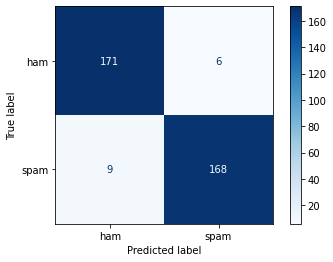

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       177
        spam       0.97      0.95      0.96       177

    accuracy                           0.96       354
   macro avg       0.96      0.96      0.96       354
weighted avg       0.96      0.96      0.96       354

Accuracy:  95.76271186440678


In [14]:
model=LogisticRegression()
classify(model, X, y)

In [15]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [16]:
### Naive Bayes

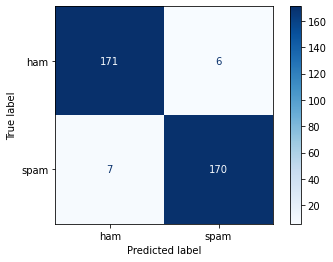

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96       177
        spam       0.97      0.96      0.96       177

    accuracy                           0.96       354
   macro avg       0.96      0.96      0.96       354
weighted avg       0.96      0.96      0.96       354

Accuracy:  96.32768361581921


In [17]:
model=MultinomialNB()
classify(model, X, y)

In [18]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype='<U4')

In [19]:
### Decision Tree

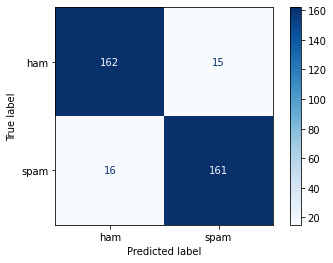

              precision    recall  f1-score   support

         ham       0.91      0.92      0.91       177
        spam       0.91      0.91      0.91       177

    accuracy                           0.91       354
   macro avg       0.91      0.91      0.91       354
weighted avg       0.91      0.91      0.91       354

Accuracy:  91.24293785310734


In [20]:
model=DecisionTreeClassifier()
classify(model, X, y)

In [21]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [22]:
### SVM

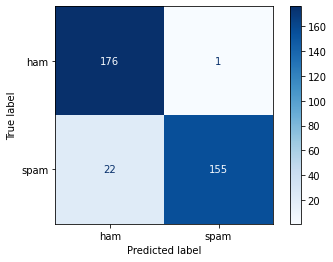

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       177
        spam       0.99      0.88      0.93       177

    accuracy                           0.94       354
   macro avg       0.94      0.94      0.93       354
weighted avg       0.94      0.94      0.93       354

Accuracy:  93.50282485875707


In [23]:
model=SVC(C=100, gamma="auto")
classify(model, X, y)

In [24]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [25]:
### KNN

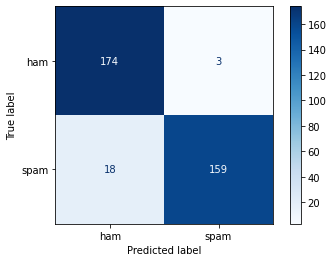

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       177
        spam       0.98      0.90      0.94       177

    accuracy                           0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354

Accuracy:  94.0677966101695


In [26]:
model=KNeighborsClassifier(n_neighbors=5)
classify(model, X, y)

In [27]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

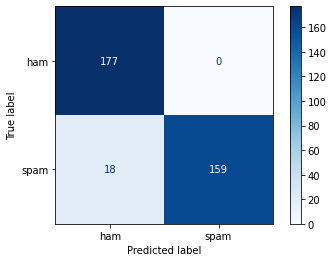

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       177
        spam       1.00      0.90      0.95       177

    accuracy                           0.95       354
   macro avg       0.95      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354

Accuracy:  94.91525423728814


In [28]:
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
classify(model, X, y)

In [29]:
clf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [ ]:
### XGBoost

In [30]:
parameters = {
        'objective': ['binary:logistic'],
        'eval_metric': ['auc'],
        'n_estimators': [600,700],
        'gamma': [0.4,0.5],
        'subsample': [0.5,0.6],
        'colsample_bytree': [0.5,0.6],
        'max_depth': [3, 4],
        'learning_rate': [0.1]
}

model = GridSearchCV(estimator=XGBClassifier(), scoring='accuracy', param_grid=parameters, return_train_score=True, n_jobs=-1,verbose=1, cv=3)

clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", model)])
clf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      m

In [31]:
best = model.best_params_
best

{'colsample_bytree': 0.5,
 'eval_metric': 'auc',
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 600,
 'objective': 'binary:logistic',
 'subsample': 0.5}

Fitting 3 folds for each of 32 candidates, totalling 96 fits


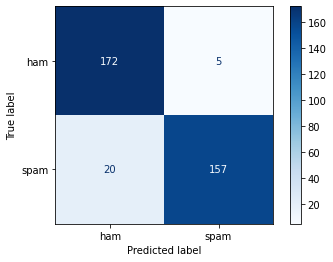

              precision    recall  f1-score   support

         ham       0.90      0.97      0.93       177
        spam       0.97      0.89      0.93       177

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354

Accuracy:  92.93785310734464


In [32]:
model = GridSearchCV(estimator=XGBClassifier(**best), scoring='accuracy', param_grid=parameters, return_train_score=True, n_jobs=-1,verbose=1, cv=3)

clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", model)])
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
    
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
    
print(classification_report(y_test, y_pred))
print("Accuracy: ", clf.score(X_test, y_test)*100)